In [ ]:
data_train_dir = "/content/insectos_corregido"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/Colab Notebooks/insectos_corregido.zip"

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: insectos_corregido/8335452/d075s0348.jpg  
  inflating: insectos_corregido/8335452/d075s0349.jpg  
  inflating: insectos_corregido/8335452/d075s0350.jpg  
  inflating: insectos_corregido/8335452/d075s0351.jpg  
  inflating: insectos_corregido/8335452/d075s0352.jpg  
  inflating: insectos_corregido/8335452/d075s0364.jpg  
  inflating: insectos_corregido/8335452/d075s0365.jpg  
  inflating: insectos_corregido/8335452/d075s0366.jpg  
  inflating: insectos_corregido/8335452/d075s0367.jpg  
  inflating: insectos_corregido/8335452/d075s0368.jpg  
  inflating: insectos_corregido/8335452/d075s0369.jpg  
  inflating: insectos_corregido/8335452/d075s0370.jpg  
  inflating: insectos_corregido/8335452/d075s0383.jpg  
  inflating: insectos_corregido/8335452/d075s0384.jpg  
  inflating: insectos_corregido/8335452/d075s0385.jpg  
  inflating: insectos_corregido/8335452/d075s0386.jpg  
  inflating: insectos_corregido/8335452/d07

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation
from keras.layers import BatchNormalization as BN
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.applications import ResNet152V2
from keras.metrics import TopKCategoricalAccuracy

In [ ]:
train_datagen = ImageDataGenerator(
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range = 0.2,
    horizontal_flip=True,
    validation_split=0.2)

In [ ]:
target_size = (64, 32)
batch_size = 512
mode = 'categorical'
numclasses = 291

In [ ]:
train_generator = train_datagen.flow_from_directory(
    data_train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode=mode,
    subset='training') # set as training data

Found 50776 images belonging to 291 classes.


In [ ]:
validation_generator = train_datagen.flow_from_directory(
    data_train_dir, # same directory as training data
    target_size=target_size,
    batch_size=batch_size,
    class_mode=mode,
    subset='validation') # set as validation data

Found 12543 images belonging to 291 classes.


In [ ]:
## DEF NN TOPOLOGY  
model = ResNet152V2(weights=None, classes=291, input_shape=(*target_size, 3))

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=0.00001)

In [ ]:
checkpoint_cb = ModelCheckpoint(filepath="/content/drive/MyDrive/Colab Notebooks/insectos_resNet152V2/insectos_resNet152V2_weight", save_best_only=True, save_weights_only=True, monitor='val_accuracy')

In [ ]:
## OPTIM AND COMPILE

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy', TopKCategoricalAccuracy(k=3, name="Top_3_accuracy")])

In [ ]:
## TRAINING with DA and LRA
history=model.fit(train_generator,
                            steps_per_epoch=len(train_generator.filenames) // batch_size, 
                            epochs=50,
                            validation_data=validation_generator,
                            callbacks=[reduce_lr,checkpoint_cb],
                            verbose=1)

Epoch 1/50
99/99 [==============================] - 381s 4s/step - loss: 5.5920 - accuracy: 0.0184 - Top_3_accuracy: 0.0459 - val_loss: 539890.6875 - val_accuracy: 0.0035 - val_Top_3_accuracy: 0.9997
Epoch 2/50
99/99 [==============================] - 338s 3s/step - loss: 4.8634 - accuracy: 0.0362 - Top_3_accuracy: 0.0936 - val_loss: 1306.0369 - val_accuracy: 0.0041 - val_Top_3_accuracy: 0.5279
Epoch 3/50
99/99 [==============================] - 316s 3s/step - loss: 4.6659 - accuracy: 0.0471 - Top_3_accuracy: 0.1177 - val_loss: 6.5948 - val_accuracy: 0.0108 - val_Top_3_accuracy: 0.0356
Epoch 4/50
99/99 [==============================] - 311s 3s/step - loss: 4.4370 - accuracy: 0.0600 - Top_3_accuracy: 0.1514 - val_loss: 5.6941 - val_accuracy: 0.0222 - val_Top_3_accuracy: 0.0525
Epoch 5/50
99/99 [==============================] - 306s 3s/step - loss: 4.0654 - accuracy: 0.1009 - Top_3_accuracy: 0.2207 - val_loss: 16.6004 - val_accuracy: 0.0023 - val_Top_3_accuracy: 0.0113
Epoch 6/50
99/99

In [ ]:
import matplotlib.pyplot as plt

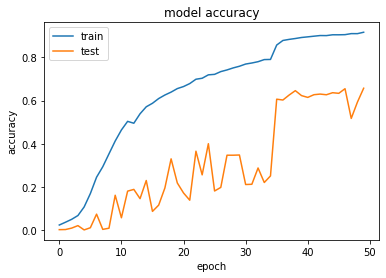

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()